In [14]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection


ff1.Cache.enable_cache('cache')

In [15]:
year = 2023
wknd = 6
ses = 'Q'
driver = 'VER'
colormap = mpl.cm.plasma

In [16]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']


In [17]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

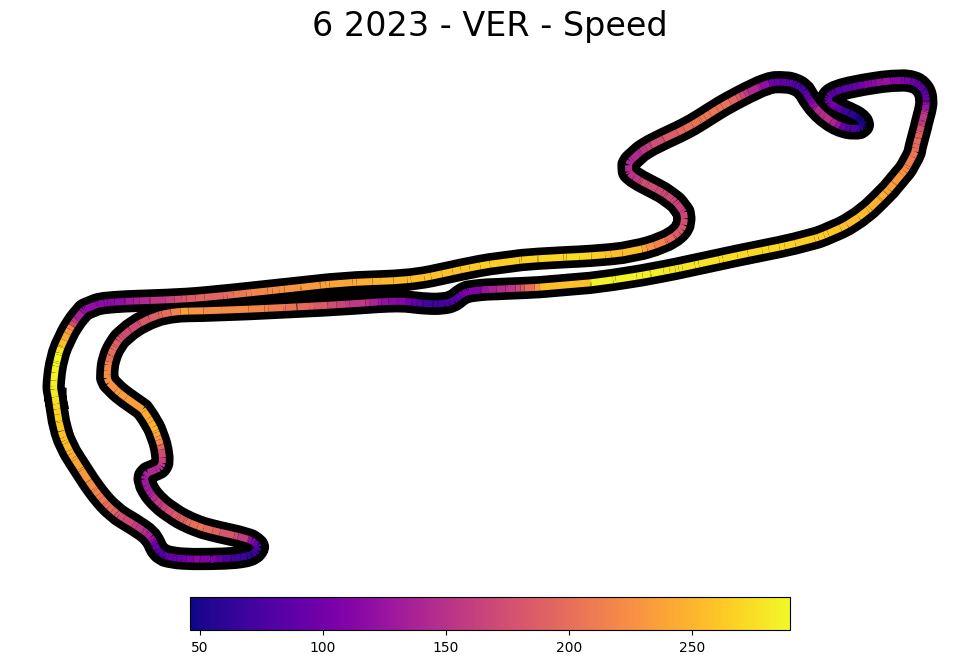

In [18]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [23]:
# Save the X Y Z of the lap telemetry to a csv file
lap.telemetry[['X', 'Y', 'Z', 'Speed']].to_csv(f'{weekend.name} {year} - {driver} - Speed.csv')

In [24]:
import json

# Assuming lap.telemetry is a DataFrame
data = lap.telemetry[['X', 'Y', 'Z','Speed']].to_dict(orient='records')

# Save data as JSON
with open(f'{weekend.name} {year} - {driver} - Speed.json', 'w') as json_file:
    json.dump(data, json_file)


In [22]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-05-27 15:10:04.026,0 days 01:22:55.906000,,NaN,0 days 00:00:00,11031,279,7,100,False,12,interpolation,0.006607,0.000002,OnTrack,-7662,-6584,501
3,2023-05-27 15:10:04.114,0 days 01:22:55.994000,,NaN,0 days 00:00:00.088000,11073,280,7,100,False,12,pos,6.870948,0.002083,OnTrack,-7668,-6519,502
4,2023-05-27 15:10:04.325,0 days 01:22:56.205000,,NaN,0 days 00:00:00.299000,11158,282,7,100,False,12,car,23.439167,0.007107,OnTrack,-7680,-6368,502
5,2023-05-27 15:10:04.394,0 days 01:22:56.274000,,NaN,0 days 00:00:00.368000,11236,283,7,100,False,12,pos,28.890704,0.008759,OnTrack,-7681,-6301,503
6,2023-05-27 15:10:04.485,0 days 01:22:56.365000,,NaN,0 days 00:00:00.459000,11315,285,7,100,False,12,car,36.105833,0.010947,OnTrack,-7678,-6190,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2023-05-27 15:11:14.965,0 days 01:24:06.845000,,NaN,0 days 00:01:10.939000,10767,267,7,100,False,12,car,3242.958056,0.983237,OnTrack,-7645,-6869,501
521,2023-05-27 15:11:15.075,0 days 01:24:06.955000,,NaN,0 days 00:01:11.049000,10828,270,7,100,False,12,pos,3251.282533,0.985761,OnTrack,-7653,-6763,502
522,2023-05-27 15:11:15.205,0 days 01:24:07.085000,,NaN,0 days 00:01:11.179000,10890,274,7,100,False,12,car,3261.224722,0.988775,OnTrack,-7659,-6660,502
523,2023-05-27 15:11:15.365,0 days 01:24:07.245000,,NaN,0 days 00:01:11.339000,10984,275,7,100,False,12,car,3273.446944,0.992481,OnTrack,-7665,-6568,502
